### コンドルセ-ヤング・ルールによる選好プロファイルの集約
- ペア多数決と同様に，あり得るすべての選択肢のペア $o_1, o_2 \in O$ について，
  各投票者が考える選好順序で上位にある選択肢に1票だけ投票する。
- 次に，あり得るすべての選好タイプ $\theta \in \Theta = \{(a \succ b \succ c), \ldots \}$
  について，次の $M(\theta)$ を計算する。

  $$
  \begin{aligned}
      M(\theta) = \#(o_1 \succ o_2) + \#(o_2 \succ o_3) + \#(o_1 \succ o_3) 
  \end{aligned}
  $$

  ここで，$o_1$，$o_2$，$o_3$は$\theta$に整合するように選択する
  （$\theta = (a \succ b \succ c)$であれば， $(o_1, o_2, o_3) = (a, b, c)$ ）。
  結果として $M(\theta)$ の最大値を与える選好タイプ $\hat{\theta}$ の順序を
  社会選好順序として採択する。

  $$
  \begin{aligned}
      \hat{\theta} = \underset{\theta \in \Theta}{\arg \max} M(\theta)
  \end{aligned}
  $$

  ただし，同じ最大値を与える$\theta$が複数ある場合は，ペア比較が
  引き分けとなっているペアが存在するので，該当するペアの間の関係は
  無差別とする。

- 任意の投票者 $i \in N$ の選好順序において，ペア順序が無差別となる選択肢のペアは存在しないので，次式が成立する。

  $$
  \forall o_1, o_2:  \#(o_1 \succ o_2) + \#(o_2 \succ o_1) = |N| 
  $$

In [25]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
import scipy.stats
from IPython.display import display_markdown

alternatives = ('a', 'b', 'c') 
prefs = np.array(tuple(it.permutations(alternatives)))

if False:
    num_voters = 100 #5 #6
    profile_idx = scipy.stats.randint.rvs(0, len(prefs), size=num_voters)
    profile = prefs[profile_idx]

elif True:
    # tally = {('a', 'b', 'c'): 37,
    #          ('a', 'c', 'b'): 53,
    #          ('c', 'a', 'b'): 12,
    #          ('c', 'b', 'a'): 21,
    #          ('b', 'c', 'a'): 65,
    #          ('b', 'a', 'c'): 10}

    # tally = {('a', 'b', 'c'): 15,
    #          ('a', 'c', 'b'): 22,
    #          ('c', 'a', 'b'): 2,
    #          ('c', 'b', 'a'): 11,
    #          ('b', 'c', 'a'): 22,
    #          ('b', 'a', 'c'): 6}

    # tally = {('a', 'b', 'c'): 13,
    #          ('a', 'c', 'b'): 21,
    #          ('c', 'a', 'b'): 3,
    #          ('c', 'b', 'a'): 13,
    #          ('b', 'c', 'a'): 23,
    #          ('b', 'a', 'c'): 5}

    # cycle: (a > b > c > a...) 
    # tally = {('a', 'b', 'c'): 18,
    #          ('a', 'c', 'b'): 19,
    #          ('c', 'a', 'b'): 8,
    #          ('c', 'b', 'a'): 8,
    #          ('b', 'c', 'a'): 25,
    #          ('b', 'a', 'c'): 0}

    v = [12, 22,  5, 14, 22,  3] # a-b tie
    # v = [1, 1, 1, 1, 1, 1] # a-b-c tie
    # v = [8, 8, 8, 8, 8, 8] # a-b-c tie

    tally = {('a', 'b', 'c'): v[0],
             ('a', 'c', 'b'): v[1],
             ('c', 'a', 'b'): v[2],
             ('c', 'b', 'a'): v[3],
             ('b', 'c', 'a'): v[4],
             ('b', 'a', 'c'): v[5]}

    profile = np.array(tuple(it.chain.from_iterable(it.repeat(p, v) for p, v in tally.items())))
    num_voters = len(profile) 

else:
    profile = prefs
    num_voters = len(profile) 

pref_str = lambda p: r' $\succ$ '.join(p)
# display_markdown('  \n'.join(f'voter {i}: &emsp;' + pref_str(p) for i, p in enumerate(profile)), raw=True)
display_markdown('  \n'.join(f'voter {i}: &emsp;' + pref_str(p) for i, p in enumerate(profile) if i < 5)
+ '  \n' + r'$\quad \vdots$', raw=True)

def is_preferred_to(pref, x, y):
    pos_x = np.flatnonzero(pref == x)[0]
    pos_y = np.flatnonzero(pref == y)[0]
    return pos_x < pos_y

pairwise_tally = {
    cp: np.count_nonzero([is_preferred_to(p, *cp) for p in profile])
        for cp in it.combinations(alternatives, 2)}  

display_markdown('  \n'.join(
    f'$\#$({pref_str(c)}) == {s}, &emsp; ' +  
    f'$\#$({pref_str(c[::-1])}) == {num_voters - s}' 
        for c, s in pairwise_tally.items()), raw=True)

M = {tuple(th): 0 for th in prefs}

# Note: #(o_1 \succ o_2) + #(o_2 \succ o_1) == num_voters for any o_1, o_2
for th in M.keys():
    for p in it.combinations(th, 2):
        nv_p = pairwise_tally.get(p)
        if nv_p == None:
            nv_p = num_voters - pairwise_tally.get(p[::-1])
        M[th] += nv_p
    
M_arr = np.array(tuple(M.values()))
max_M = np.max(M_arr)
idx = np.flatnonzero(M_arr == max_M) # There can be multiple occurrences of the max value

if len(idx) > 1:
    # ペア比較に引き分けがある場合の処理
    md_txt = ''
    prev_all_eq = False
    for i, x in enumerate(prefs[idx].T):
        all_eq = np.all(x[0] == x[1:])
        if i > 0:
            if (not all_eq) and (not prev_all_eq):
                md_txt += r' $\sim$ '
            else: 
                md_txt += r' $\succ$ '
        prev_all_eq = all_eq
        md_txt += x[0]
else:
    md_txt = pref_str(prefs[idx[0]])

display_markdown('  \n'.join(
    f'M({pref_str(th)}) == {v}' for th, v in M.items()), raw=True)

display_markdown(f'Condorcet-Young rule: &emsp; {md_txt}  \n', raw=True)


voter 0: &emsp;a $\succ$ b $\succ$ c  
voter 1: &emsp;a $\succ$ b $\succ$ c  
voter 2: &emsp;a $\succ$ b $\succ$ c  
voter 3: &emsp;a $\succ$ b $\succ$ c  
voter 4: &emsp;a $\succ$ b $\succ$ c  
$\quad \vdots$

$\#$(a $\succ$ b) == 39, &emsp; $\#$(b $\succ$ a) == 39  
$\#$(a $\succ$ c) == 37, &emsp; $\#$(c $\succ$ a) == 41  
$\#$(b $\succ$ c) == 37, &emsp; $\#$(c $\succ$ b) == 41

M(a $\succ$ b $\succ$ c) == 113  
M(a $\succ$ c $\succ$ b) == 117  
M(b $\succ$ a $\succ$ c) == 113  
M(b $\succ$ c $\succ$ a) == 117  
M(c $\succ$ a $\succ$ b) == 121  
M(c $\succ$ b $\succ$ a) == 121

Condorcet-Young rule: &emsp; c $\succ$ a $\sim$ b  


#### 解説
- 以下の解説のセルを正常に実行するには Notebook の最初から順にセルを実行しておく必要がある。
- 選好プロファイルの生成については，`ch10_plurality_voting.ipynb` を参照。
- コンドルセ-ヤング・ルールの前半部分の処理はペア多数決
  `ch10_pairwise_majority_rule.ipynb` と同様となっている。

$M(\theta)$ の最大値に関する処理
```Python
    M_arr = np.array(tuple(M.values()))
    max_M = np.max(M_arr)
    idx = np.flatnonzero(M_arr == max_M) 
```
において，`idx` は `M_arr` の最大値に該当する要素のインデックスを全て含む配列となる。

`len(idx) > 1` であれば，$M(\theta)$ の比較で引き分けとなる選好タイプ
$\theta \in \Theta = \{(a \succ b \succ c), \ldots \}$
が存在する。

In [7]:
import numpy as np

M = {('a', 'b', 'c'): 113,
     ('a', 'c', 'b'): 117,
     ('b', 'a', 'c'): 113,
     ('b', 'c', 'a'): 117,
     ('c', 'a', 'b'): 121,
     ('c', 'b', 'a'): 121}

# M = {('a', 'b', 'c'): 72,
#      ('a', 'c', 'b'): 72,
#      ('b', 'a', 'c'): 72,
#      ('b', 'c', 'a'): 72,
#      ('c', 'a', 'b'): 72,
#      ('c', 'b', 'a'): 72}

M_arr = np.array(tuple(M.values()))
max_M = np.max(M_arr)
print('max_M ==', max_M)

idx = np.flatnonzero(M_arr == max_M) 
print('idx ==', repr(idx))
print('M_arr[idx] ==', repr(M_arr[idx]))

prefs = np.array(tuple(M.keys()))
print('prefs[idx] ==\n', repr(prefs[idx]))
print('prefs[idx].T ==\n', repr(prefs[idx].T))

print('\niterating over prefs[idx].T...')
for i, x in enumerate(prefs[idx].T):
    print('i ==', i)
    print('x ==', repr(x))

max_M == 121
idx == array([4, 5], dtype=int64)
M_arr[idx] == array([121, 121])
prefs[idx] ==
 array([['c', 'a', 'b'],
       ['c', 'b', 'a']], dtype='<U1')
prefs[idx].T ==
 array([['c', 'c'],
       ['a', 'b'],
       ['b', 'a']], dtype='<U1')

iterating over prefs[idx].T...
i == 0
x == array(['c', 'c'], dtype='<U1')
i == 1
x == array(['a', 'b'], dtype='<U1')
i == 2
x == array(['b', 'a'], dtype='<U1')


[`numpy.all(arr)`](https://numpy.org/doc/stable/reference/generated/numpy.all.html) は `arr` の要素が全て `True` であれば `True`，そうでなければ `False` を返す。

In [23]:
import numpy as np

print(np.all([True, False, False]))
print(np.all([True, True, True]))

False
True


コンドルセ-ヤング・ルールに関わる対数尤度の式（書籍10章参照）

$$
\begin{aligned}
L(\theta) & = \ln \ell(\theta)  = \ln P( \{k_j\}_{j=1}^{J} \mid \theta) 
= \sum_{j=1}^J \ln P(k_j \mid \theta) \\
& = \underbrace{\sum_{j=1}^J \ln {}_n C_{k_j} + J n}_{\text{const.}}+
    \underbrace{\ln \dfrac{\mu}{1 - \mu}}_{\text{const.}}
    \sum_{j=1}^J {k_j} 
\end{aligned}
$$

に現れる
$\ln \dfrac{\mu}{1-\mu}$
は対数オッズと呼ばれ，
その値が正となるための条件は，$\mu > \dfrac{1}{2}$ となる。

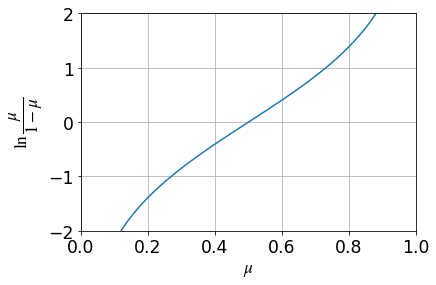

In [26]:
import numpy as np
# import itertools as it
import matplotlib.pyplot as plt

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['ytick.labelsize'] = 'xx-large' #'large'
plt.rcParams['xtick.labelsize'] = 'xx-large' #'large'
plt.rcParams['axes.labelsize']  = 'xx-large' #'large'

mu = np.linspace(0.1, 0.9, 100)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(mu, np.log(mu) - np.log(1 - mu))
ax.set_xlim(0, 1)
ax.set_ylim(-2, 2)
ax.set_xlabel('$\mu$', fontsize='xx-large')
ax.set_ylabel('$\ln \dfrac{\mu}{1-\mu}$', fontsize='xx-large')
ax.grid()
plt.savefig('log_odds.pdf', bbox_inches='tight')

#### 参考文献
- H.P. Young, ``Condorcet's Theory of Voting,'' American Political Science Review, Vol. 82, No. 4, 1988